In [3]:
import pandas as pd

path = r'C:\Users\Yael Aguilar\Downloads\companies.csv'

def get_tickers(path):
    companies = pd.read_csv(path)
    ticker_list = list(companies['Ticker'])
    print('Retrieved', str(len(ticker_list)), 'ticker symbols.')
    return ticker_list

In [4]:
import quandl


def get_prices(ticker):
    print('Retrieving data for', ticker)
    prices = quandl.get('WIKI/'+ ticker)['Adj. Close'].reset_index()
    prices['Ticker'] = ticker
    return prices


data = []

ticker_list = get_tickers(path)

for ticker in ticker_list:
    prices = get_prices(ticker)
    data.append(prices)

Retrieved 30 ticker symbols.
Retrieving data for AAPL
Retrieving data for NFLX
Retrieving data for AMZN
Retrieving data for MSFT
Retrieving data for GOOG
Retrieving data for TSLA
Retrieving data for FB
Retrieving data for AAP
Retrieving data for DIS
Retrieving data for NKE
Retrieving data for UA
Retrieving data for BAC
Retrieving data for CCL
Retrieving data for CI
Retrieving data for AAL
Retrieving data for LUV
Retrieving data for WFC
Retrieving data for WMT
Retrieving data for HD
Retrieving data for ORCL
Retrieving data for IBM


LimitExceededError: (Status 429) (Quandl Error QELx04) You have exceeded the API speed limit of 20 calls per 10 minutes. Please slow down your requests.

In [5]:
df = pd.concat(data, sort = True)
df

,Adj. Close,Date,Ticker
0,0.422706,1980-12-12,AAPL
1,0.400652,1980-12-15,AAPL
2,0.371246,1980-12-16,AAPL
3,0.380362,1980-12-17,AAPL
4,0.391536,1980-12-18,AAPL
...,...,...,...
8072,47.020000,2018-03-21,ORCL
8073,45.890000,2018-03-22,ORCL
8074,44.790000,2018-03-23,ORCL
8075,46.480000,2018-03-26,ORCL


In [6]:
def concat_pivot(data):
    df = pd.concat(data, sort = True)
    #print(df)
    pivot = df.pivot_table(values = 'Adj. Close', columns = 'Ticker', index = 'Date')
    return pivot
df = concat_pivot(data)
df

Ticker,AAL,AAP,AAPL,AMZN,BAC,CCL,CI,DIS,FB,GOOG,HD,LUV,MSFT,NFLX,NKE,ORCL,TSLA,UA,WFC,WMT
Date,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,54.09,115.24,171.270,1581.86,31.87,67.06,167.05,101.820000,169.39,1090.88,178.02,57.78,92.48,316.48,66.35,47.02,316.53,14.07,54.79,88.18
2018-03-22,52.31,111.71,168.845,1544.10,30.55,66.20,165.34,100.600000,164.89,1049.08,175.29,57.00,89.79,306.70,64.42,45.89,309.10,13.71,52.53,87.14
2018-03-23,51.01,110.84,164.940,1495.56,29.17,64.41,164.00,98.540000,159.39,1021.57,171.80,56.72,87.18,300.94,64.63,44.79,301.54,13.72,50.98,85.42


In [16]:
df.tail(10)

Ticker,AAL,AAP,AAPL,AMZN,BAC,CCL,CI,DIS,FB,GOOG,HD,LUV,MSFT,NFLX,NKE,ORCL,TSLA,UA,WFC,WMT
Date,,,,,,,,,,,,,,,,,,,,
2018-03-14,55.28,117.06,178.440,1591.00,32.14,66.96,166.88,103.90,184.19,1149.49,177.41,59.62,93.85,321.55,66.20,52.32,326.63,14.02,56.63,87.67
2018-03-15,55.17,117.10,178.650,1582.32,32.10,66.73,166.90,103.24,183.86,1149.58,178.07,59.94,94.18,321.09,66.39,52.37,325.60,13.83,56.83,87.51
2018-03-16,55.40,116.63,178.020,1571.68,32.17,66.91,168.67,102.87,185.09,1135.73,178.96,60.90,94.60,318.45,65.91,52.27,321.35,14.08,55.90,89.17
2018-03-19,54.62,115.87,175.300,1544.93,31.98,67.63,166.44,101.48,172.56,1099.82,177.10,60.60,92.89,313.48,65.71,51.95,313.56,14.07,55.48,87.45
2018-03-20,55.32,114.25,175.240,1586.51,31.98,67.85,165.00,101.35,168.15,1097.71,178.16,60.69,93.13,317.50,66.80,47.05,310.55,14.01,54.90,87.95
2018-03-21,54.09,115.24,171.270,1581.86,31.87,67.06,167.05,101.82,169.39,1090.88,178.02,57.78,92.48,316.48,66.35,47.02,316.53,14.07,54.79,88.18
2018-03-22,52.31,111.71,168.845,1544.10,30.55,66.20,165.34,100.60,164.89,1049.08,175.29,57.00,89.79,306.70,64.42,45.89,309.10,13.71,52.53,87.14
2018-03-23,51.01,110.84,164.940,1495.56,29.17,64.41,164.00,98.54,159.39,1021.57,171.80,56.72,87.18,300.94,64.63,44.79,301.54,13.72,50.98,85.42
2018-03-26,51.86,114.77,172.770,1555.86,30.44,65.80,168.68,100.65,160.06,1053.21,176.38,57.59,93.78,320.35,65.90,46.48,304.18,14.46,52.29,87.50


In [7]:
def compute_returns(df):
    returns = df.pct_change()
    return returns 

df1 = compute_returns(df)

In [8]:
df1

Ticker,AAL,AAP,AAPL,AMZN,BAC,CCL,CI,DIS,FB,GOOG,HD,LUV,MSFT,NFLX,NKE,ORCL,TSLA,UA,WFC,WMT
Date,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,-0.022234,0.008665,-0.022655,-0.002931,-0.003440,-0.011643,0.012424,0.004637,0.007374,-0.006222,-0.000786,-0.047949,-0.006979,-0.003213,-0.006737,-0.000638,0.019256,0.004283,-0.002004,0.002615
2018-03-22,-0.032908,-0.030632,-0.014159,-0.023871,-0.041418,-0.012824,-0.010236,-0.011982,-0.026566,-0.038318,-0.015335,-0.013499,-0.029087,-0.030902,-0.029088,-0.024032,-0.023473,-0.025586,-0.041248,-0.011794
2018-03-23,-0.024852,-0.007788,-0.023128,-0.031436,-0.045172,-0.027039,-0.008105,-0.020477,-0.033356,-0.026223,-0.019910,-0.004912,-0.029068,-0.018781,0.003260,-0.023970,-0.024458,0.000729,-0.029507,-0.019738


In [9]:
def return_risk_ratio(df, days=30):
    means = pd.DataFrame(df.tail(days).mean())
    std = pd.DataFrame(df.tail(days).std())
    ratios = pd.concat([means, std], axis =1).reset_index()
    ratios.columns = ['Company', 'Mean', 'Std']
    ratios['Ratio'] = ratios['Mean']/ratios['Std']
    return ratios

In [10]:
ratios = return_risk_ratio(df1)

In [11]:
top10 = ratios.sort_values('Ratio', ascending = False).head(10)

In [12]:
def corr_matrix(df, days= 30):
    corr_matrix = df.tail(days).corr()
    return corr_matrix
returns = []
target_list = df1[list(top10['Company'])]
correlation = corr_matrix(target_list)

In [13]:
correlation

Ticker,NFLX,AMZN,UA,AAPL,AAP,AAL,MSFT,NKE,LUV,GOOG
Ticker,,,,,,,,,,
NFLX,1.000000,0.737368,0.377118,0.733364,0.350776,0.532008,0.765552,0.419110,0.471499,0.772645
AMZN,0.737368,1.000000,0.467725,0.775919,0.242478,0.765969,0.827540,0.497091,0.446716,0.831677
UA,0.377118,0.467725,1.000000,0.460013,0.034121,0.343974,0.413541,0.300698,0.243258,0.313700
AAPL,0.733364,0.775919,0.460013,1.000000,0.182409,0.720879,0.881631,0.588998,0.629806,0.779337
AAP,0.350776,0.242478,0.034121,0.182409,1.000000,0.301426,0.239617,0.274633,0.271251,0.267872
AAL,0.532008,0.765969,0.343974,0.720879,0.301426,1.000000,0.662295,0.545875,0.695205,0.753528
MSFT,0.765552,0.827540,0.413541,0.881631,0.239617,0.662295,1.000000,0.502890,0.488640,0.820030
NKE,0.419110,0.497091,0.300698,0.588998,0.274633,0.545875,0.502890,1.000000,0.538007,0.558954
LUV,0.471499,0.446716,0.243258,0.629806,0.271251,0.695205,0.488640,0.538007,1.000000,0.478096


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def barchart(df,x,y, length=8, width = 14, title=""):
    df = df.sort_values(x, ascending = False)
    plt.figure(figsize = (width, length))
    chart = sns.barplot(data=df, x=x, y=y)
    plt.title(title + '\n', fontsize=16)
    return chart

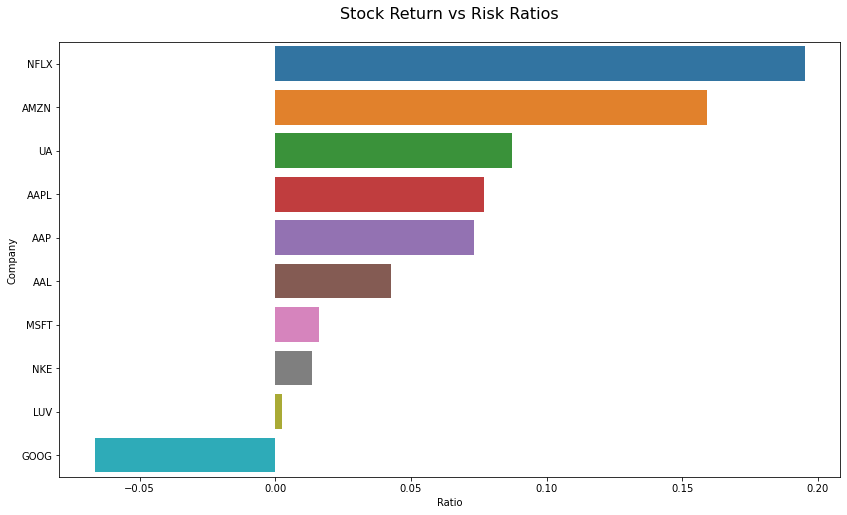

In [15]:
bar_plot = barchart(top10, 'Ratio', 'Company', title = 'Stock Return vs Risk Ratios')

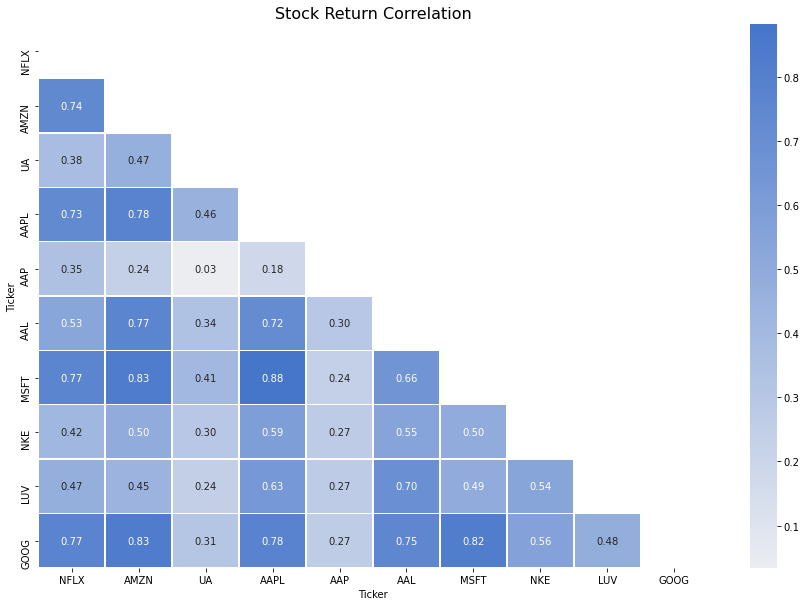

In [17]:
import numpy as np 

def correlation_plot(corr, title = ''):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    
    plt.subplots(figsize=(15,10))
    cmap = sns.diverging_palette(6, 255, as_cmap= True)
    
    chart = sns.heatmap(corr, mask = mask, cmap= cmap, center = 0, linewidths=.5, annot=True, fmt='.2f')
    plt.title(title, fontsize= 16)
    
    return mask


    
    
corr_plot = correlation_plot(correlation, title= 'Stock Return Correlation')

    

In [18]:
def save_viz(chart, title):
    fig = chart.get_figure()
    fig.savefig(title + '.png')

In [24]:
#PipeLine to execute a Stock Analysis correlation 



In [13]:
import requests as http
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

path = 'https://financialmodelingprep.com/api/v3/stock/list?apikey=60ea23d5071d16bec275682c1267d941'






def get_tickers(path):
    symbols_list = []
    
    data= http.get(path)
    data = data.json()
    data = data[:10]
    return data
    

def acquire():
    
    df = pd.DataFrame()
    symbol_data = get_tickers(path)
    
    symbol_list= []
    for i in symbol_data:
        symbol_list.append(i['symbol'])
    
    for i in symbol_list:
        prices  = http.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/{i}?serietype=line&apikey=60ea23d5071d16bec275682c1267d941').json()
        prices = prices['historical']
        
        if len(prices) <=3000:

            continue
        prices=prices[:3001]
        prices_list = []
        for x in prices:
            
            
            prices_list.append(x['close'])
            
        df[i] = prices_list  
        
    dates = http.get('https://financialmodelingprep.com/api/v3/historical-price-full/AAPL?serietype=line&apikey=60ea23d5071d16bec275682c1267d941').json()
    dates = dates['historical']
    dates = dates[:3001]
    dates_list = []
    for i in dates:
        dates_list.append(i['date'])
        
        
    df['new index'] = dates_list
    df = df.set_index('new index')
    
    
    return df

def compute_returns(df):
    
    returns = df.pct_change()
    return returns

def return_risk_ratio(df, days=30):
    means = pd.DataFrame(df.head(days).mean())
    std = pd.DataFrame(df.head(days).std())
    ratios = pd.concat([means, std], axis = 1).reset_index()
    ratios.columns = ['Company', 'Mean', 'Std']
    ratios['Ratio'] = ratios['Mean'] / ratios['Std']
    return ratios

def corr_matrix(df, days=30):
    corr_matrix = df.head(days).corr()
    return corr_matrix

def barchart(df, x,y, length=8, width=14, title=''):
    df = df.sort_values(x, ascending = False)
    plt.figure(figsize = (width, length))
    chart = sns.barplot(data=df, x=x, y=y)
    plt.title(title + '\n', fontsize=16)
    return chart


def correlation_plot(corr, title=''):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    plt.subplots(figsize=(15,10))
    cmap = sns.diverging_palette(6,255, as_cmap=True)
    chart = sns.heatmap(corr, mask= mask, cmap=cmap, center = 0, linewidths = .5, annot=True, fmt='.2f')
    plt.title(title, fontsize = 16)
    return chart

def save_viz(chart, title):
    fig = chart.get_figure()
    fig.savefig(title+ '.png')
    
def analyze(returns, days=30):
    ratios = return_risk_ratio(returns, days=days)
    top10 = ratios.sort_values('Ratio', ascending = False).head(10)
   
    target_list = returns[list(top10['Company'])]
    correlation = corr_matrix(target_list)
    return top10, correlation


def report(top10, correlation):
    bar_plot = barchart(top10, 'Ratio', 'Company', title = 'Stock Return vs Risk Ratios' + str(day) + 'Days')
    save_viz(bar_plot, 'Return vs. Risk top 10' + str(day) + 'Days')
    corr_plot = correlation_plot(correlation, title='Stock Return Correlation - ' + str(day) + ' Days')
    save_viz(corr_plot, 'Correlation Plot - ' + str(day) + ' Days')

    
if __name__ == '__main__':
    data = acquire()
    
    
    num_days = [90,180,360]
    
    for day in num_days:
        top10, correlation = analyze(data, days=day)
        report(top10, correlation)



KeyboardInterrupt: Interrupted by user